In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Introduction

The [Spanish Virtual Observatory (SVO) Filter Profile Service](http://svo2.cab.inta-csic.es/theory/fps3/) is a great resource for homogenized photometric filter curves and metadata. With `svo_filters`, I tried to create a lightweight and flexible package to incorporate these filters into Python applications.

Install in the usual fashion with

```
cd svo_filters
python setup.py install
```

Then import like so

In [2]:
from svo_filters import svo

The actual filters are stored locally as XML files and can be viewed with

In [8]:
svo.filters()

Band,CalibrationReference,FWHM,Facility,FilterProfileService,MagSys,PhotCalID,PhotSystem,ProfileReference,WavelengthCen,WavelengthEff,WavelengthMax,WavelengthMean,WavelengthMin,WavelengthPeak,WavelengthPhot,WavelengthPivot,WavelengthUCD,WavelengthUnit,WidthEff,ZeroPoint,ZeroPointType,ZeroPointUnit,filterID,n_bins,n_channels,path,refs,Instrument,DetectorType,Comments
str91,str86,str91,str91,str91,str91,str91,str91,str91,str91,str91,str91,str91,str91,str91,str91,str91,str91,str91,str91,str91,str91,str91,str91,str91,str91,str91,str91,str91,str86,str91
2MASS.H,http://adsabs.harvard.edu/cgi-bin/nph-bib_query?bibcode=2003AJ....126.1090C&db_key=AST,0.26096,2MASS,ivo://svo/fps,Vega,2MASS/2MASS.H/Vega,2MASS,http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html,1.64872,1.662,1.8231,1.662,1.47874,1.671,1.64238,1.64949,em.wl,um,0.25094,1024.0,Pogson,Jy,2MASS/2MASS.H,1,58,/Users/jfilippazzo/Documents/Modules/svo_filters/svo_filters/data/filters/2MASS.H,['AST'],--,--,--
2MASS.J,http://adsabs.harvard.edu/cgi-bin/nph-bib_query?bibcode=2003AJ....126.1090C,0.21491,2MASS,ivo://svo/fps,Vega,2MASS/2MASS.J/Vega,2MASS,http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html#rsr,1.23906,1.235,1.4068,1.235,1.08065,1.326,1.23209,1.23931,em.wl,um,0.16241,1594.0,Pogson,Jy,2MASS/2MASS.J,1,107,/Users/jfilippazzo/Documents/Modules/svo_filters/svo_filters/data/filters/2MASS.J,['2003AJ....126.1090C'],--,--,--
2MASS.Ks,http://adsabs.harvard.edu/cgi-bin/nph-bib_query?bibcode=2003AJ....126.1090C,0.27846,2MASS,ivo://svo/fps,Vega,2MASS/2MASS.Ks/Vega,2MASS,http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html#rsr,2.1634,2.159,2.35524,2.159,1.95437,2.263,2.15577,2.16386,em.wl,um,0.26189,666.8,Pogson,Jy,2MASS/2MASS.Ks,1,76,/Users/jfilippazzo/Documents/Modules/svo_filters/svo_filters/data/filters/2MASS.Ks,['2003AJ....126.1090C'],--,--,--
IRAC.I1,--,0.74317,Spitzer,ivo://svo/fps,Vega,Spitzer/IRAC.I1/Vega,IRAC,http://ssc.spitzer.caltech.edu/irac/spectral_response.html,3.54656,3.50751,3.96144,3.55726,3.12962,3.73052,3.52039,3.55079,em.wl,um,0.68362,277.222253517,Pogson,Jy,Spitzer/IRAC.I1,1,391,/Users/jfilippazzo/Documents/Modules/svo_filters/svo_filters/data/filters/IRAC.I1,[],IRAC,--,--
IRAC.I2,--,1.00968,Spitzer,ivo://svo/fps,Vega,Spitzer/IRAC.I2/Vega,IRAC,http://ssc.spitzer.caltech.edu/irac/spectral_response.html,4.50243,4.43658,5.05606,4.50493,3.91733,4.43578,4.4543,4.49596,em.wl,um,0.86499,179.036636396,Pogson,Jy,Spitzer/IRAC.I2,1,401,/Users/jfilippazzo/Documents/Modules/svo_filters/svo_filters/data/filters/IRAC.I2,[],IRAC,--,--
IRAC.I3,--,1.39119,Spitzer,ivo://svo/fps,Vega,Spitzer/IRAC.I3/Vega,IRAC,http://ssc.spitzer.caltech.edu/irac/spectral_response.html,5.71566,5.6281,6.50889,5.73857,4.89828,5.96712,5.65638,5.72446,em.wl,um,1.25612,113.848293842,Pogson,Jy,Spitzer/IRAC.I3,1,311,/Users/jfilippazzo/Documents/Modules/svo_filters/svo_filters/data/filters/IRAC.I3,[],IRAC,--,--
IRAC.I4,--,2.83118,Spitzer,ivo://svo/fps,Vega,Spitzer/IRAC.I4/Vega,IRAC,http://ssc.spitzer.caltech.edu/irac/spectral_response.html,7.85565,7.58916,9.58759,7.92737,6.29938,8.45909,7.67414,7.88423,em.wl,um,2.52885,61.9973692512,Pogson,Jy,Spitzer/IRAC.I4,1,350,/Users/jfilippazzo/Documents/Modules/svo_filters/svo_filters/data/filters/IRAC.I4,[],IRAC,--,--
Kepler.K,--,0.39934,Kepler,ivo://svo/fps,Vega,Kepler/Kepler.K/Vega,Kepler,http://keplergo.arc.nasa.gov/CalibrationResponse.shtml,0.63593,0.57813,0.90502,0.64168,0.41837,0.589,0.59823,0.63034,em.wl,um,0.35284,3033.0662326897,Pogson,Jy,Kepler/Kepler.K,1,623,/Users/jfilippazzo/Documents/Modules/svo_filters/svo_filters/data/filters/Kepler.K,[],Kepler,--,--
NIRISS.F277W,--,0.73007,JWST,ivo://svo/fps,Vega,JWST/NIRISS.F277W/Vega,NIRISS,http://jwst.astro.umontreal.ca/?page_id=116,2.77775,2.72355,3.22972,2.78392,2.36989,2.902,2.73952,2.77579,em.wl,um,0.71526,430.62938035989,Pogson,Jy,JWST/NIRISS.F277W,1,933,/Users/jfilippazzo/Documents/Modules/svo_filters/svo_filters/data/filters/NIRISS.F277W,[],NIRISS,1,--


# Load a Photometric Filter

To load a filter object, just pass the band name to the `Filter` class. We can then view the metadata and see a plot!

     Attributes                                              Values                                        
-------------------- --------------------------------------------------------------------------------------
                Band H                                                                                     
CalibrationReference http://adsabs.harvard.edu/cgi-bin/nph-bib_query?bibcode=2003AJ....126.1090C&db_key=AST
                FWHM 0.26096                                                                               
            Facility 2MASS                                                                                 
FilterProfileService ivo://svo/fps                                                                         
              MagSys Vega                                                                                  
           PhotCalID 2MASS/2MASS.H/Vega                                                                    
          PhotSystem 2MASS  

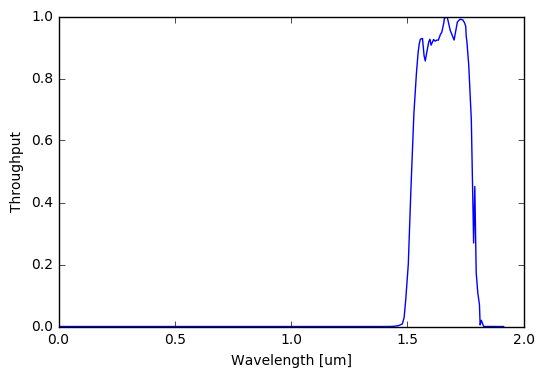

In [9]:
H_band = svo.Filter('2MASS.H')
H_band.info()
H_band.plot()

The actual relative spectral response curve is stored as an array of the wavelength and throughput.

In [10]:
H_band.rsr.shape

(2, 58)

# Load a Grism

Filters can also be binned arbitrarily, for use with grisms. We can pass integers to the `n_bins` or `n_channels` arguments to specify the number of wavelength bins or channels per bin, respectively.

15 bins of 634 channels each.
     Attributes                                              Values                                        
-------------------- --------------------------------------------------------------------------------------
            Comments />                                                                                    
                FWHM 0.57288                                                                               
            Facility HST                                                                                   
FilterProfileService ivo://svo/fps                                                                         
          Instrument WFC3                                                                                  
              MagSys Vega                                                                                  
           PhotCalID HST/WFC3_IR.G141/Vega                                                                

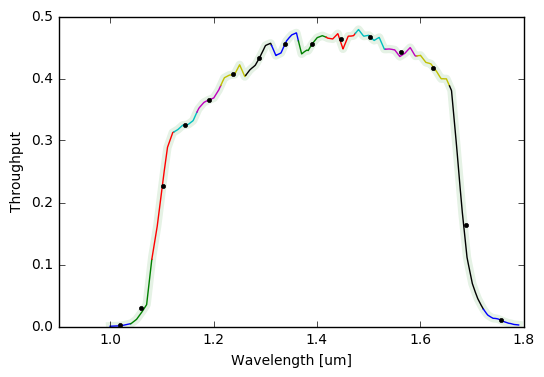

In [11]:
G141 = svo.Filter('WFC3_IR.G141', n_bins=15)
G141.info()
G141.plot()

This can get even fancier by passing an arbitrary array of length `n_channels` to the `bin_throughput` argument in order to change the shape of the bin throughput.

15 bins of 634 channels each.
15 bins of 634 channels each.


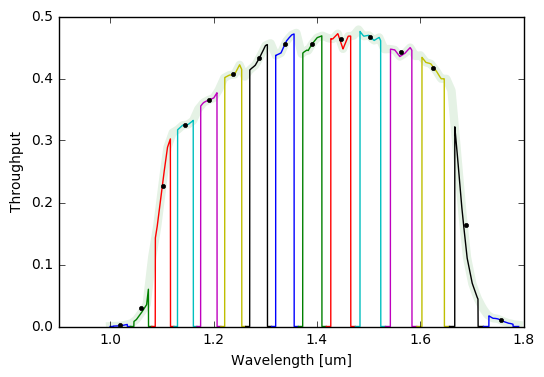

In [12]:
import numpy as np
G141 = svo.Filter('WFC3_IR.G141', n_bins=15)

# Let's just do a top-hat
throughput = np.ones(G141.n_channels)
throughput[:100] = 0
throughput[-100:] = 0
G141.bin(bin_throughput=throughput)
G141.plot()

# Getting More Filters

If the filter you need is not in the `filters()` list, the package will ask if you want to download it.

In [19]:
# Delete one first!
svo.Filter('NIRISS.F200W').delete()

# Now try it...
F200W = svo.Filter('NIRISS.F200W')

Are you sure you want to delete JWST/NIRISS.F200W ? [y/n] y
Loading filters into table...
Current filters: 2MASS.H, 2MASS.J, 2MASS.Ks, IRAC.I1, IRAC.I2, IRAC.I3, IRAC.I4, Kepler.K, NIRISS.F277W, WFC3_IR.G102, WFC3_IR.G141, WFC3_UVIS2.F814W, WFC3_UVIS2.F850LP, WISE.W1, WISE.W2, WISE.W3, WISE.W4 

No filters match /Users/jfilippazzo/Documents/Modules/svo_filters/svo_filters/data/filters/NIRISS.F200W
Would you like me to download it? [y/n] y

A full list of available filters from the
SVO Filter Profile Service can be found at
http://svo2.cab.inta-csic.es/theory/fps3/

Enter the band name to retrieve (e.g. 2MASS/2MASS.J): JWST/NIRISS.F200W
Band stored as /Users/jfilippazzo/Documents/Modules/svo_filters/svo_filters/data/filters/NIRISS.F200W


     Attributes                                              Values                                        
-------------------- --------------------------------------------------------------------------------------
        DetectorType 1                                                                                     
                FWHM 0.47561                                                                               
            Facility JWST                                                                                  
FilterProfileService ivo://svo/fps                                                                         
          Instrument NIRISS                                                                                
              MagSys Vega                                                                                  
           PhotCalID JWST/NIRISS.F200W/Vega                                                                
          PhotSystem NIRISS 

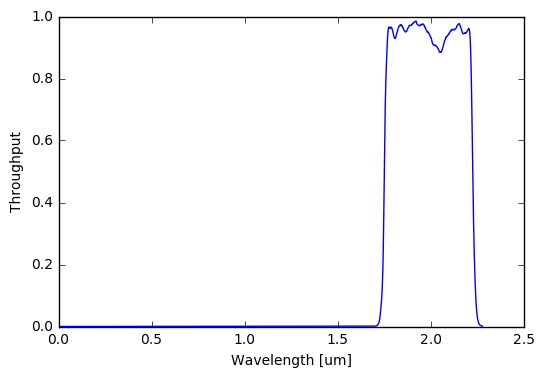

In [20]:
F200W.info()
F200W.plot()

Filters are fun!